# Data Cleaning & EDA Sign Language Recognition

**Setup**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CSV File

This file includes a list of all recorded sequences. Each row denotes one sequence and has information about participant_id and target sign.

* We have around **95000 sequences**.
* They show **250 signs**. Each sign is shown approximately 300 to 400 times.
* The sequences were recorded by **21 participants**. Each participant contributed 3500 to 5000 sequences. 

We add the label numbers to the signs in a column called **"target"**.

* There are no duplicate rows. 
* There are no missing values.


In [33]:
#import csv file with train targets

#train_df = pd.read_csv('/Users/ronjaweiblen/Bootcamp/Capstone_Project_SignMeUp/data/asl-signs/train.csv')
train_df = pd.read_csv('../data/train_sub944.csv')
train_df.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/27610/561476403.parquet,27610,561476403,refrigerator
1,train_landmark_files/62590/1601341273.parquet,62590,1601341273,pizza
2,train_landmark_files/27610/11345226.parquet,27610,11345226,ear
3,train_landmark_files/22343/2474751636.parquet,22343,2474751636,girl
4,train_landmark_files/62590/231359756.parquet,62590,231359756,mad


In [34]:
train_df.shape

(944, 4)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            944 non-null    object
 1   participant_id  944 non-null    int64 
 2   sequence_id     944 non-null    int64 
 3   sign            944 non-null    object
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


In [36]:
train_df[['sign', 'participant_id']].groupby('sign').count().sort_values(by='participant_id')

,participant_id
sign,
zipper,1
brown,1
flag,1
fish,1
can,1
...,...
room,8
aunt,8
kitty,8


<AxesSubplot:xlabel='sign'>

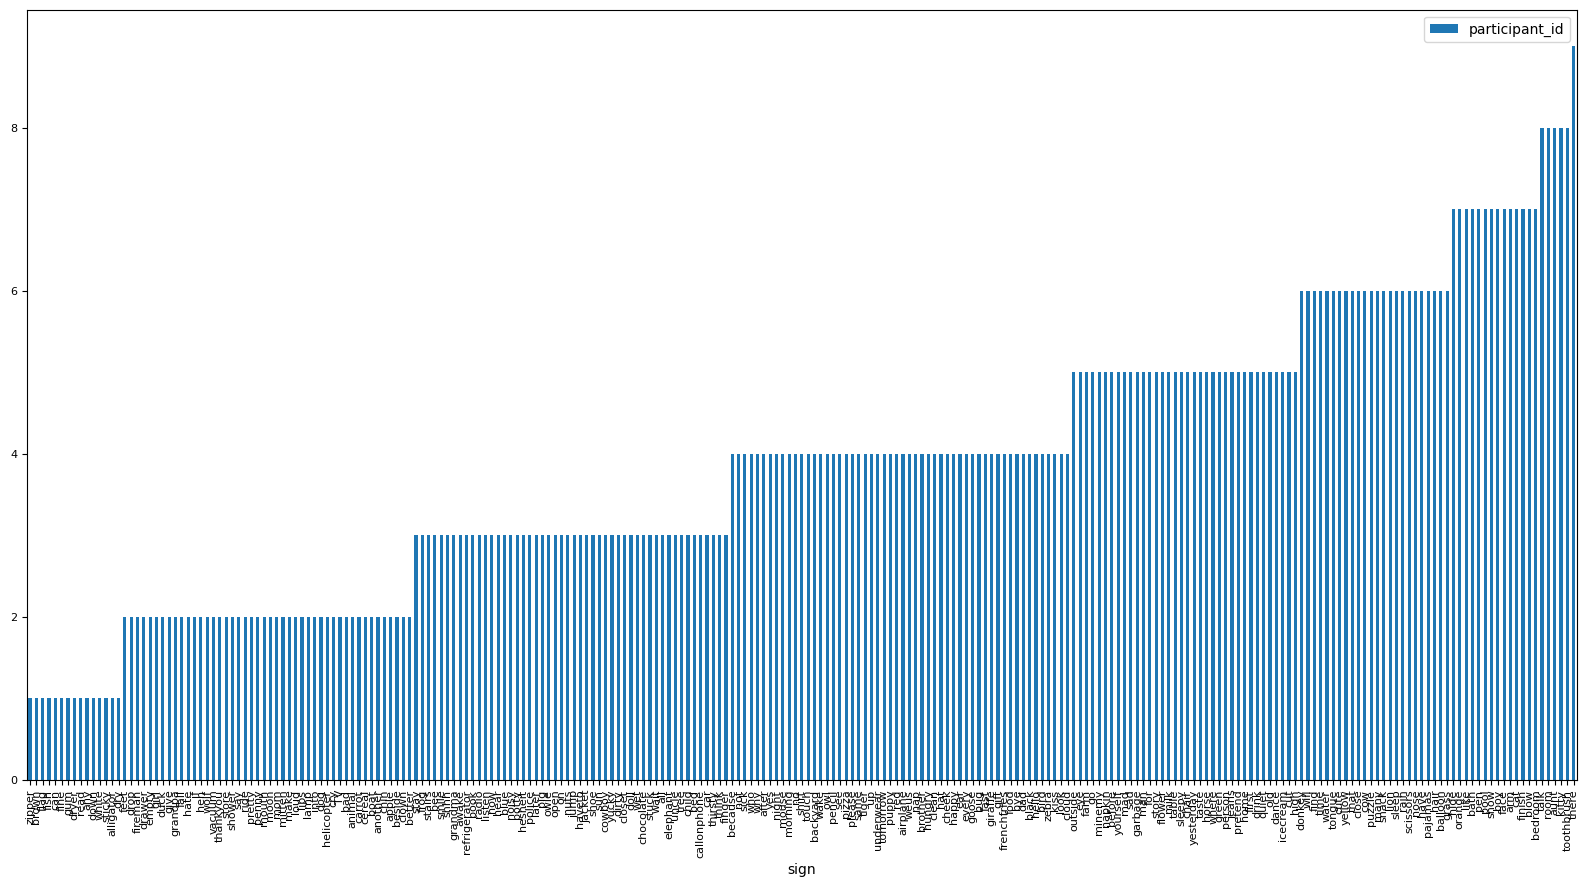

In [37]:
train_df[['sign', 'participant_id']].groupby('sign').count().sort_values(by='participant_id').plot(kind='bar', figsize=(20,10), fontsize=8)

In [38]:
# check for duplicates
train_df.duplicated().sum()

6

In [39]:
train_df[['participant_id', 'sign']].groupby('participant_id').count()

,sign
participant_id,
2044,56
4718,38
16069,59
18796,36
22343,57
25571,32
26734,44
27610,40
28656,35


<AxesSubplot:xlabel='sign'>

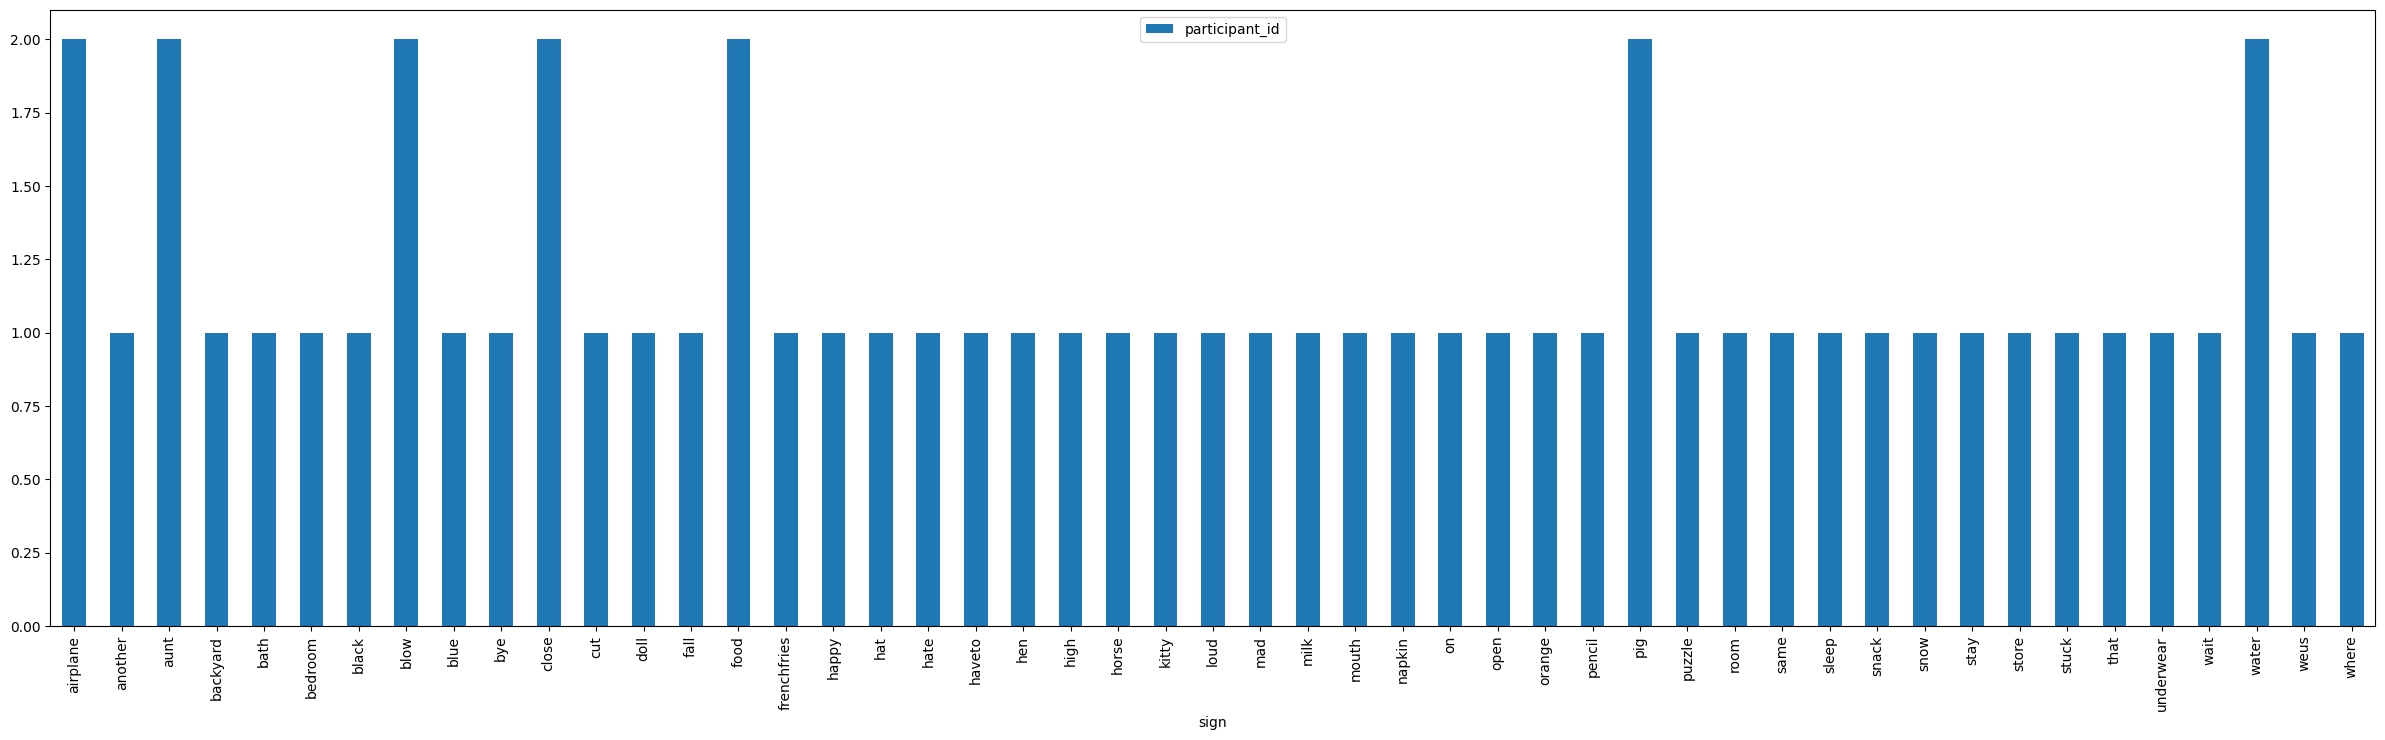

In [40]:
#one example participant
train_df[['participant_id', 'sign']].query('participant_id == 2044').groupby('sign').count().plot(kind='bar', figsize=(30,8))

**Adding the label numbers to the table**

In [41]:
sign_map = {"TV": 0, "after": 1, "airplane": 2, "all": 3, "alligator": 4, "animal": 5, "another": 6, "any": 7, "apple": 8, "arm": 9, "aunt": 10, "awake": 11, "backyard": 12, "bad": 13, "balloon": 14, "bath": 15, "because": 16, "bed": 17, "bedroom": 18, "bee": 19, "before": 20, "beside": 21, "better": 22, "bird": 23, "black": 24, "blow": 25, "blue": 26, "boat": 27, "book": 28, "boy": 29, "brother": 30, "brown": 31, "bug": 32, "bye": 33, "callonphone": 34, "can": 35, "car": 36, "carrot": 37, "cat": 38, "cereal": 39, "chair": 40, "cheek": 41, "child": 42, "chin": 43, "chocolate": 44, "clean": 45, "close": 46, "closet": 47, "cloud": 48, "clown": 49, "cow": 50, "cowboy": 51, "cry": 52, "cut": 53, "cute": 54, "dad": 55, "dance": 56, "dirty": 57, "dog": 58, "doll": 59, "donkey": 60, "down": 61, "drawer": 62, "drink": 63, "drop": 64, "dry": 65, "dryer": 66, "duck": 67, "ear": 68, "elephant": 69, "empty": 70, "every": 71, "eye": 72, "face": 73, "fall": 74, "farm": 75, "fast": 76, "feet": 77, "find": 78, "fine": 79, "finger": 80, "finish": 81, "fireman": 82, "first": 83, "fish": 84, "flag": 85, "flower": 86, "food": 87, "for": 88, "frenchfries": 89, "frog": 90, "garbage": 91, "gift": 92, "giraffe": 93, "girl": 94, "give": 95, "glasswindow": 96, "go": 97, "goose": 98, "grandma": 99, "grandpa": 100, "grass": 101, "green": 102, "gum": 103, "hair": 104, "happy": 105, "hat": 106, "hate": 107, "have": 108, "haveto": 109, "head": 110, "hear": 111, "helicopter": 112, "hello": 113, "hen": 114, "hesheit": 115, "hide": 116, "high": 117, "home": 118, "horse": 119, "hot": 120, "hungry": 121, "icecream": 122, "if": 123, "into": 124, "jacket": 125, "jeans": 126, "jump": 127, "kiss": 128, "kitty": 129, "lamp": 130, "later": 131, "like": 132, "lion": 133, "lips": 134, "listen": 135, "look": 136, "loud": 137, "mad": 138, "make": 139, "man": 140, "many": 141, "milk": 142, "minemy": 143, "mitten": 144, "mom": 145, "moon": 146, "morning": 147, "mouse": 148, "mouth": 149, "nap": 150, "napkin": 151, "night": 152, "no": 153, "noisy": 154, "nose": 155, "not": 156, "now": 157, "nuts": 158, "old": 159, "on": 160, "open": 161, "orange": 162, "outside": 163, "owie": 164, "owl": 165, "pajamas": 166, "pen": 167, "pencil": 168, "penny": 169, "person": 170, "pig": 171, "pizza": 172, "please": 173, "police": 174, "pool": 175, "potty": 176, "pretend": 177, "pretty": 178, "puppy": 179, "puzzle": 180, "quiet": 181, "radio": 182, "rain": 183, "read": 184, "red": 185, "refrigerator": 186, "ride": 187, "room": 188, "sad": 189, "same": 190, "say": 191, "scissors": 192, "see": 193, "shhh": 194, "shirt": 195, "shoe": 196, "shower": 197, "sick": 198, "sleep": 199, "sleepy": 200, "smile": 201, "snack": 202, "snow": 203, "stairs": 204, "stay": 205, "sticky": 206, "store": 207, "story": 208, "stuck": 209, "sun": 210, "table": 211, "talk": 212, "taste": 213, "thankyou": 214, "that": 215, "there": 216, "think": 217, "thirsty": 218, "tiger": 219, "time": 220, "tomorrow": 221, "tongue": 222, "tooth": 223, "toothbrush": 224, "touch": 225, "toy": 226, "tree": 227, "uncle": 228, "underwear": 229, "up": 230, "vacuum": 231, "wait": 232, "wake": 233, "water": 234, "wet": 235, "weus": 236, "where": 237, "white": 238, "who": 239, "why": 240, "will": 241, "wolf": 242, "yellow": 243, "yes": 244, "yesterday": 245, "yourself": 246, "yucky": 247, "zebra": 248, "zipper": 249}

# applying dictionary on sign to create target column
train_df['target'] = train_df.sign.map(sign_map)
train_df.head()

,path,participant_id,sequence_id,sign,target
0,train_landmark_files/27610/561476403.parquet,27610,561476403,refrigerator,186
1,train_landmark_files/62590/1601341273.parquet,62590,1601341273,pizza,172
2,train_landmark_files/27610/11345226.parquet,27610,11345226,ear,68
3,train_landmark_files/22343/2474751636.parquet,22343,2474751636,girl,94
4,train_landmark_files/62590/231359756.parquet,62590,231359756,mad,138


In [42]:
train_df.describe()

,participant_id,sequence_id,target
count,944.000000,9.440000e+02,944.000000
mean,32739.154661,2.115316e+09,127.957627
std,16300.947492,1.255977e+09,72.138743
min,2044.000000,2.940300e+05,0.000000
25%,22343.000000,9.985756e+08,64.750000
50%,30680.000000,2.156020e+09,132.000000
75%,37779.000000,3.206063e+09,190.000000
max,62590.000000,4.285866e+09,249.000000


In [43]:
train_df.isna().sum()

path              0
participant_id    0
sequence_id       0
sign              0
target            0
dtype: int64

In [44]:
train_df.nunique()

path              938
participant_id     21
sequence_id       938
sign              245
target            245
dtype: int64

In [45]:
subs = train_df

# Parquet files

1. We read in a subset of the parquet files and make one big table.

In [46]:
"""
#choose a subset of participants
subs = train_df.query("participant_id <= 5000") #takes 2 participants
#subs = subs.query("sign == 'tiger' or sign == 'pencil' or sign == 'sleepy' or sign == 'grandma' or sign == 'chocolate'")#takes 5 signs
"""

'\n#choose a subset of participants\nsubs = train_df.query("participant_id <= 5000") #takes 2 participants\n#subs = subs.query("sign == \'tiger\' or sign == \'pencil\' or sign == \'sleepy\' or sign == \'grandma\' or sign == \'chocolate\'")#takes 5 signs\n'

In [47]:
"""sign_list = ['alligator', 'radio', 'moon', 'sleep', 'grandpa', 'tiger', 'pencil', 'sleepy', 'grandma', 'chocolate']
# Limiting dataset to 5 signs from sign_list
subs=subs[subs['sign'].isin(sign_list)]
subs.head()
"""

"sign_list = ['alligator', 'radio', 'moon', 'sleep', 'grandpa', 'tiger', 'pencil', 'sleepy', 'grandma', 'chocolate']\n# Limiting dataset to 5 signs from sign_list\nsubs=subs[subs['sign'].isin(sign_list)]\nsubs.head()\n"

In [48]:
#read in all parquet files
df = pd.DataFrame() #initialize empty dataframe

for i in range(len(subs)):
    p = subs.iloc[i, 0]
    s = subs.iloc[i, 4]
    data = pd.read_parquet('../data/asl-signs/'+p)
    data['sign'] = s
    data['sequence_id'] = subs.iloc[i, 2]
    df = pd.concat([df, data], axis = 0)

In [49]:
df.head()

,frame,row_id,type,landmark_index,x,y,z,sign,sequence_id
0,80,80-face-0,face,0,0.409425,0.516504,-0.029809,186,561476403
1,80,80-face-1,face,1,0.407734,0.481863,-0.066800,186,561476403
2,80,80-face-2,face,2,0.410977,0.490478,-0.033124,186,561476403
3,80,80-face-3,face,3,0.402035,0.445660,-0.052824,186,561476403
4,80,80-face-4,face,4,0.408072,0.471397,-0.072277,186,561476403


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18149232 entries, 0 to 3257
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   frame           int16  
 1   row_id          object 
 2   type            object 
 3   landmark_index  int16  
 4   x               float64
 5   y               float64
 6   z               float64
 7   sign            int64  
 8   sequence_id     int64  
dtypes: float64(3), int16(2), int64(2), object(2)
memory usage: 1.1+ GB


In [51]:
df.shape

(18149232, 9)

In [52]:
df.nunique()

frame                  294
row_id              159642
type                     4
landmark_index         468
x                  8621357
y                  9429596
z                 15422141
sign                   245
sequence_id            938
dtype: int64

**Drop some columns we don't need**

In [53]:
#drop z
df = df.drop('z', axis = 1)

#drop row_id
df = df.drop('row_id', axis = 1)


**Make one column per frame**

In [54]:
#make one column per frame with all the landmarks 

df_wide = df
df_wide['idx'] = df_wide.groupby('sequence_id').cumcount()+1
df_wide = df_wide.pivot_table(index=['sequence_id', 'frame', 'sign'], columns=['landmark_index', 'type'], 
                    values=['x', 'y'], aggfunc='first')

df_wide = df_wide.sort_index(axis=1, level=1)
df_wide.columns = [f'{x}_{y}_{z}' for x,y,z in df_wide.columns]
df_wide = df_wide.reset_index()

df_wide.head(25)

,sequence_id,frame,sign,x_0_face,x_0_left_hand,x_0_pose,x_0_right_hand,y_0_face,y_0_left_hand,y_0_pose,...,x_463_face,y_463_face,x_464_face,y_464_face,x_465_face,y_465_face,x_466_face,y_466_face,x_467_face,y_467_face
0,294030,85,234,0.498755,0.618785,0.505378,NaN,0.361466,0.773771,0.304610,...,0.536012,0.266503,0.528341,0.266786,0.523587,0.266144,0.608551,0.261020,0.620608,0.249546
1,294030,86,234,0.501065,0.629386,0.507911,NaN,0.359615,0.774752,0.302531,...,0.535143,0.266544,0.527473,0.266635,0.522693,0.265841,0.610107,0.261028,0.622137,0.249417
2,294030,87,234,0.499962,0.602209,0.508635,NaN,0.360178,0.769008,0.301351,...,0.535554,0.266059,0.527721,0.266277,0.522910,0.265589,0.610493,0.260524,0.622537,0.249050
3,294030,88,234,0.500519,0.619759,0.508675,NaN,0.361350,0.774806,0.300940,...,0.535323,0.266071,0.527471,0.266245,0.522759,0.265528,0.610257,0.260377,0.622371,0.248936
4,294030,89,234,0.500168,0.597031,0.508232,NaN,0.359432,0.763041,0.300852,...,0.534760,0.266119,0.527158,0.266187,0.522741,0.265392,0.610866,0.260528,0.622977,0.249042
5,294030,90,234,0.502909,0.595470,0.508178,NaN,0.360013,0.760764,0.300840,...,0.535451,0.266204,0.527707,0.266258,0.522926,0.265466,0.610666,0.260666,0.622744,0.248972
6,294030,91,234,0.501054,0.595586,0.507908,NaN,0.360566,0.760879,0.300740,...,0.535372,0.266279,0.527743,0.266309,0.523064,0.265511,0.610835,0.260503,0.622803,0.248911
7,294030,92,234,0.502192,0.596679,0.507654,NaN,0.360847,0.760552,0.300254,...,0.535884,0.266058,0.527940,0.266230,0.523166,0.265518,0.611549,0.260599,0.623661,0.248991
8,294030,93,234,0.497338,0.581443,0.507121,NaN,0.360883,0.752612,0.300253,...,0.534828,0.266422,0.526823,0.266518,0.521949,0.265781,0.610562,0.260994,0.622769,0.249327
9,294030,94,234,0.496627,0.576779,0.506757,NaN,0.361669,0.750475,0.300256,...,0.534761,0.266095,0.526836,0.266260,0.522154,0.265561,0.610182,0.260876,0.622358,0.249323


**Deal with NaN**

* set missing values where the whole sequence is missing to 0
* interpolate other NaN

In [55]:
df_wide.isna().sum()

sequence_id          0
frame                0
sign                 0
x_0_face           142
x_0_left_hand    23095
                 ...  
y_465_face         142
x_466_face         142
y_466_face         142
x_467_face         142
y_467_face         142
Length: 1089, dtype: int64

* Interpolate NaNs linearly from their neighbors. 
* If there are more than 2 consecutive NaN, don´t impute them. We will later set them to 0.
* Inerpolation should only be done per sequence --° group by sequence first

In [56]:
#before: NaN in x_0_right hand, row 5 
df_wide.head(10)

,sequence_id,frame,sign,x_0_face,x_0_left_hand,x_0_pose,x_0_right_hand,y_0_face,y_0_left_hand,y_0_pose,...,x_463_face,y_463_face,x_464_face,y_464_face,x_465_face,y_465_face,x_466_face,y_466_face,x_467_face,y_467_face
0,294030,85,234,0.498755,0.618785,0.505378,NaN,0.361466,0.773771,0.304610,...,0.536012,0.266503,0.528341,0.266786,0.523587,0.266144,0.608551,0.261020,0.620608,0.249546
1,294030,86,234,0.501065,0.629386,0.507911,NaN,0.359615,0.774752,0.302531,...,0.535143,0.266544,0.527473,0.266635,0.522693,0.265841,0.610107,0.261028,0.622137,0.249417
2,294030,87,234,0.499962,0.602209,0.508635,NaN,0.360178,0.769008,0.301351,...,0.535554,0.266059,0.527721,0.266277,0.522910,0.265589,0.610493,0.260524,0.622537,0.249050
3,294030,88,234,0.500519,0.619759,0.508675,NaN,0.361350,0.774806,0.300940,...,0.535323,0.266071,0.527471,0.266245,0.522759,0.265528,0.610257,0.260377,0.622371,0.248936
4,294030,89,234,0.500168,0.597031,0.508232,NaN,0.359432,0.763041,0.300852,...,0.534760,0.266119,0.527158,0.266187,0.522741,0.265392,0.610866,0.260528,0.622977,0.249042
5,294030,90,234,0.502909,0.595470,0.508178,NaN,0.360013,0.760764,0.300840,...,0.535451,0.266204,0.527707,0.266258,0.522926,0.265466,0.610666,0.260666,0.622744,0.248972
6,294030,91,234,0.501054,0.595586,0.507908,NaN,0.360566,0.760879,0.300740,...,0.535372,0.266279,0.527743,0.266309,0.523064,0.265511,0.610835,0.260503,0.622803,0.248911
7,294030,92,234,0.502192,0.596679,0.507654,NaN,0.360847,0.760552,0.300254,...,0.535884,0.266058,0.527940,0.266230,0.523166,0.265518,0.611549,0.260599,0.623661,0.248991
8,294030,93,234,0.497338,0.581443,0.507121,NaN,0.360883,0.752612,0.300253,...,0.534828,0.266422,0.526823,0.266518,0.521949,0.265781,0.610562,0.260994,0.622769,0.249327
9,294030,94,234,0.496627,0.576779,0.506757,NaN,0.361669,0.750475,0.300256,...,0.534761,0.266095,0.526836,0.266260,0.522154,0.265561,0.610182,0.260876,0.622358,0.249323


In [57]:
#use interpolate method for single missing values
df_wide = df_wide.groupby('sequence_id').apply(lambda group: group.interpolate(limit = 2, limit_direction = 'both'))
df_wide.head(10)

,sequence_id,frame,sign,x_0_face,x_0_left_hand,x_0_pose,x_0_right_hand,y_0_face,y_0_left_hand,y_0_pose,...,x_463_face,y_463_face,x_464_face,y_464_face,x_465_face,y_465_face,x_466_face,y_466_face,x_467_face,y_467_face
0,294030,85,234,0.498755,0.618785,0.505378,NaN,0.361466,0.773771,0.304610,...,0.536012,0.266503,0.528341,0.266786,0.523587,0.266144,0.608551,0.261020,0.620608,0.249546
1,294030,86,234,0.501065,0.629386,0.507911,NaN,0.359615,0.774752,0.302531,...,0.535143,0.266544,0.527473,0.266635,0.522693,0.265841,0.610107,0.261028,0.622137,0.249417
2,294030,87,234,0.499962,0.602209,0.508635,NaN,0.360178,0.769008,0.301351,...,0.535554,0.266059,0.527721,0.266277,0.522910,0.265589,0.610493,0.260524,0.622537,0.249050
3,294030,88,234,0.500519,0.619759,0.508675,NaN,0.361350,0.774806,0.300940,...,0.535323,0.266071,0.527471,0.266245,0.522759,0.265528,0.610257,0.260377,0.622371,0.248936
4,294030,89,234,0.500168,0.597031,0.508232,NaN,0.359432,0.763041,0.300852,...,0.534760,0.266119,0.527158,0.266187,0.522741,0.265392,0.610866,0.260528,0.622977,0.249042
5,294030,90,234,0.502909,0.595470,0.508178,NaN,0.360013,0.760764,0.300840,...,0.535451,0.266204,0.527707,0.266258,0.522926,0.265466,0.610666,0.260666,0.622744,0.248972
6,294030,91,234,0.501054,0.595586,0.507908,NaN,0.360566,0.760879,0.300740,...,0.535372,0.266279,0.527743,0.266309,0.523064,0.265511,0.610835,0.260503,0.622803,0.248911
7,294030,92,234,0.502192,0.596679,0.507654,NaN,0.360847,0.760552,0.300254,...,0.535884,0.266058,0.527940,0.266230,0.523166,0.265518,0.611549,0.260599,0.623661,0.248991
8,294030,93,234,0.497338,0.581443,0.507121,NaN,0.360883,0.752612,0.300253,...,0.534828,0.266422,0.526823,0.266518,0.521949,0.265781,0.610562,0.260994,0.622769,0.249327
9,294030,94,234,0.496627,0.576779,0.506757,NaN,0.361669,0.750475,0.300256,...,0.534761,0.266095,0.526836,0.266260,0.522154,0.265561,0.610182,0.260876,0.622358,0.249323


In [58]:
#replace the rest of the NaN with 0
df_wide.fillna(0, inplace = True)
df_wide.head(10)

,sequence_id,frame,sign,x_0_face,x_0_left_hand,x_0_pose,x_0_right_hand,y_0_face,y_0_left_hand,y_0_pose,...,x_463_face,y_463_face,x_464_face,y_464_face,x_465_face,y_465_face,x_466_face,y_466_face,x_467_face,y_467_face
0,294030,85,234,0.498755,0.618785,0.505378,0.0,0.361466,0.773771,0.304610,...,0.536012,0.266503,0.528341,0.266786,0.523587,0.266144,0.608551,0.261020,0.620608,0.249546
1,294030,86,234,0.501065,0.629386,0.507911,0.0,0.359615,0.774752,0.302531,...,0.535143,0.266544,0.527473,0.266635,0.522693,0.265841,0.610107,0.261028,0.622137,0.249417
2,294030,87,234,0.499962,0.602209,0.508635,0.0,0.360178,0.769008,0.301351,...,0.535554,0.266059,0.527721,0.266277,0.522910,0.265589,0.610493,0.260524,0.622537,0.249050
3,294030,88,234,0.500519,0.619759,0.508675,0.0,0.361350,0.774806,0.300940,...,0.535323,0.266071,0.527471,0.266245,0.522759,0.265528,0.610257,0.260377,0.622371,0.248936
4,294030,89,234,0.500168,0.597031,0.508232,0.0,0.359432,0.763041,0.300852,...,0.534760,0.266119,0.527158,0.266187,0.522741,0.265392,0.610866,0.260528,0.622977,0.249042
5,294030,90,234,0.502909,0.595470,0.508178,0.0,0.360013,0.760764,0.300840,...,0.535451,0.266204,0.527707,0.266258,0.522926,0.265466,0.610666,0.260666,0.622744,0.248972
6,294030,91,234,0.501054,0.595586,0.507908,0.0,0.360566,0.760879,0.300740,...,0.535372,0.266279,0.527743,0.266309,0.523064,0.265511,0.610835,0.260503,0.622803,0.248911
7,294030,92,234,0.502192,0.596679,0.507654,0.0,0.360847,0.760552,0.300254,...,0.535884,0.266058,0.527940,0.266230,0.523166,0.265518,0.611549,0.260599,0.623661,0.248991
8,294030,93,234,0.497338,0.581443,0.507121,0.0,0.360883,0.752612,0.300253,...,0.534828,0.266422,0.526823,0.266518,0.521949,0.265781,0.610562,0.260994,0.622769,0.249327
9,294030,94,234,0.496627,0.576779,0.506757,0.0,0.361669,0.750475,0.300256,...,0.534761,0.266095,0.526836,0.266260,0.522154,0.265561,0.610182,0.260876,0.622358,0.249323


In [59]:
#check
df_wide.isna().sum()

sequence_id      0
frame            0
sign             0
x_0_face         0
x_0_left_hand    0
                ..
y_465_face       0
x_466_face       0
y_466_face       0
x_467_face       0
y_467_face       0
Length: 1089, dtype: int64

**Reassign frame index so it starts from 0**

In [60]:
#give frames a new index starting from 0
df_wide["frame_index"] = df_wide.groupby("sequence_id").cumcount()
df_wide = df_wide.drop('frame', axis = 1)
df_wide.head(25)

,sequence_id,sign,x_0_face,x_0_left_hand,x_0_pose,x_0_right_hand,y_0_face,y_0_left_hand,y_0_pose,y_0_right_hand,...,y_463_face,x_464_face,y_464_face,x_465_face,y_465_face,x_466_face,y_466_face,x_467_face,y_467_face,frame_index
0,294030,234,0.498755,0.618785,0.505378,0.0,0.361466,0.773771,0.304610,0.0,...,0.266503,0.528341,0.266786,0.523587,0.266144,0.608551,0.261020,0.620608,0.249546,0
1,294030,234,0.501065,0.629386,0.507911,0.0,0.359615,0.774752,0.302531,0.0,...,0.266544,0.527473,0.266635,0.522693,0.265841,0.610107,0.261028,0.622137,0.249417,1
2,294030,234,0.499962,0.602209,0.508635,0.0,0.360178,0.769008,0.301351,0.0,...,0.266059,0.527721,0.266277,0.522910,0.265589,0.610493,0.260524,0.622537,0.249050,2
3,294030,234,0.500519,0.619759,0.508675,0.0,0.361350,0.774806,0.300940,0.0,...,0.266071,0.527471,0.266245,0.522759,0.265528,0.610257,0.260377,0.622371,0.248936,3
4,294030,234,0.500168,0.597031,0.508232,0.0,0.359432,0.763041,0.300852,0.0,...,0.266119,0.527158,0.266187,0.522741,0.265392,0.610866,0.260528,0.622977,0.249042,4
5,294030,234,0.502909,0.595470,0.508178,0.0,0.360013,0.760764,0.300840,0.0,...,0.266204,0.527707,0.266258,0.522926,0.265466,0.610666,0.260666,0.622744,0.248972,5
6,294030,234,0.501054,0.595586,0.507908,0.0,0.360566,0.760879,0.300740,0.0,...,0.266279,0.527743,0.266309,0.523064,0.265511,0.610835,0.260503,0.622803,0.248911,6
7,294030,234,0.502192,0.596679,0.507654,0.0,0.360847,0.760552,0.300254,0.0,...,0.266058,0.527940,0.266230,0.523166,0.265518,0.611549,0.260599,0.623661,0.248991,7
8,294030,234,0.497338,0.581443,0.507121,0.0,0.360883,0.752612,0.300253,0.0,...,0.266422,0.526823,0.266518,0.521949,0.265781,0.610562,0.260994,0.622769,0.249327,8
9,294030,234,0.496627,0.576779,0.506757,0.0,0.361669,0.750475,0.300256,0.0,...,0.266095,0.526836,0.266260,0.522154,0.265561,0.610182,0.260876,0.622358,0.249323,9


**Make sure all sequences have the same length**

Longest videos are up to 138 frames.

50 % range between 6 and 34.--> Which ones should we exclude?

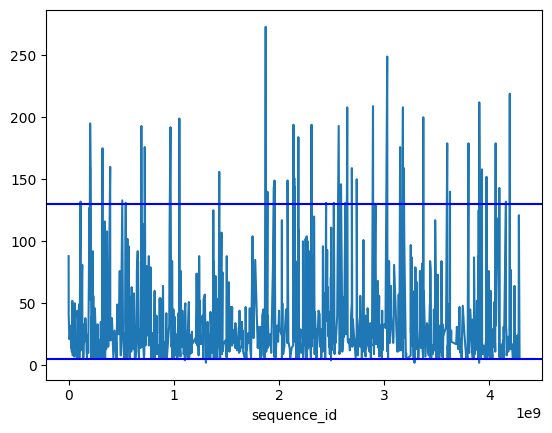

In [61]:
df_wide.groupby('sequence_id').count()['frame_index'].plot() #does this make sense
# only one line may be specified; full height
plt.axhline(y = 5, color = 'b', label = 'axvline - full height')
plt.axhline(y = 130, color = 'b', label = 'axvline - full height')

In [62]:
numofframes = df_wide.groupby('sequence_id').count()['frame_index']
numofframes.sort_values(ascending=True)


sequence_id
1304860276      2
3287144487      2
3901454534      2
2493797685      4
1104608979      4
             ... 
2893055388    209
3903169971    212
4192960092    219
3028220604    249
1872939496    273
Name: frame_index, Length: 938, dtype: int64

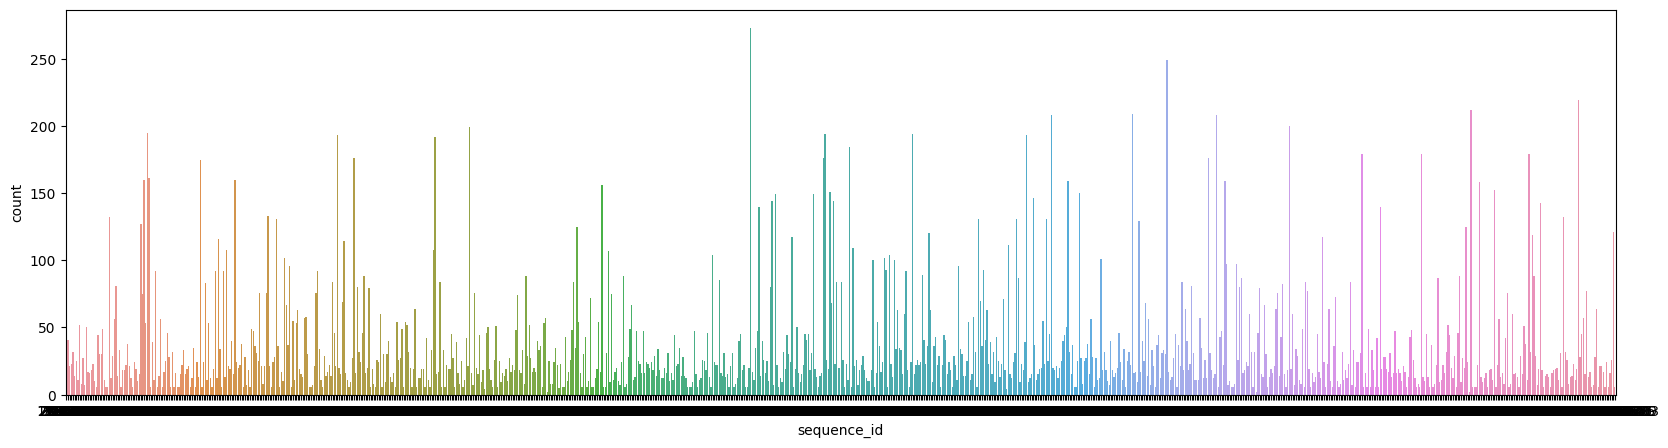

In [63]:
#plot number of frames per sequence
fig, ax = plt.subplots(figsize=(20, 5))
 
# drawing the plot
sns.countplot(x = df_wide['sequence_id'],  ax=ax)
plt.show()

*Are the videos different lengths depending on the sign?*

Not really, at least not with these signs.

In [64]:
"""#plot number of frames per sequence and sign
#fig, ax = plt.subplots(figsize=(5, 20))
 
# drawing the plot
g = sns.FacetGrid(df_wide, col="sign")
g.map(sns.countplot, 'sequence_id')
plt.show()
"""

ValueError: Image size of 73500x300 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 73500x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 73500x300 with 245 Axes>

**Dropping sequences with too few frames**



In [65]:
df_wide.sequence_id.nunique()

938

Before removing we have 342 sequences.

In [66]:
#drop sequences with less than 5 frames
df_wide = df_wide.groupby('sequence_id').filter(lambda x : len(x)>4)
df_wide.sequence_id.nunique()

933

Filtering removes 5 sequences

**Dropping(?) sequences with too many frames**

In [67]:
#cut off sequences after frame 130 

#just for now so I can do the padding


In [68]:
df_wide = df_wide.groupby('sequence_id').filter(lambda x : len(x)<131)
df_wide.sequence_id.nunique()

885

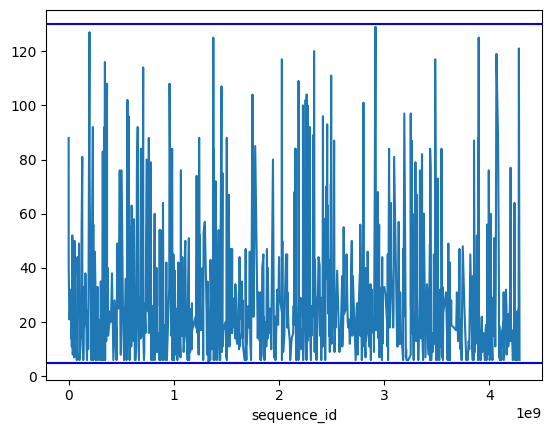

In [69]:
df_wide.groupby('sequence_id').count()['frame_index'].plot() #does this make sense
# only one line may be specified; full height
plt.axhline(y = 5, color = 'b', label = 'axvline - full height')
plt.axhline(y = 130, color = 'b', label = 'axvline - full height')

In [70]:
df_wide.shape

(25051, 1089)

**Zero-padding to same length**

In [71]:
#we have to make sequences first for this to work

#decide which columns are of interest
FEATURE_COLUMNS = df_wide.columns.to_list()[2:1088]
FEATURE_COLUMNS

#check last item
last = FEATURE_COLUMNS[-1]
last

'y_467_face'

In [72]:
#make sequences
sequences= list()

for sequence_id, group in df_wide.groupby('sequence_id'):
    sequence_features = group[FEATURE_COLUMNS]
    #label = df_wide[df_wide.sequence_id == sequence_id].iloc[0].sign #this would at the label to the sequence if we want that
    values = sequence_features.values 
    #sequences.append((sequence_features, label))
    sequences.append(values)

In [73]:
#look at one sequence
sequences[50].shape

(92, 1086)

In [74]:
# define function for padding

def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')


In [75]:

new_seq = []
for one_seq in sequences: #loop through all sequences
    new_one_seq = padding(one_seq,130, 1086)
    new_seq.append(new_one_seq)


final_seq = np.stack(new_seq)
final_seq[9]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
type(final_seq[5])

numpy.ndarray

In [77]:
final_seq[5].shape

(130, 1086)

In [78]:
#write function to truncate the middle data points of each sequence

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [79]:
crop_seq = []
for one_seq in final_seq: #loop through all sequences
    
    crop_one_seq = crop_center(one_seq,1086, 30)
    crop_seq.append(crop_one_seq)


cropped_seq = np.stack(crop_seq)
cropped_seq[9]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
type(cropped_seq[5])

numpy.ndarray

In [81]:
cropped_seq[5].shape

(30, 1086)

In [82]:
cropped_seq.shape

(885, 30, 1086)

We now have a list of arrays with 30 frames and 1086 x & y values for the landmarks. 

Rename it X as this is what it is:)

In [83]:
X = cropped_seq

In [84]:
X.shape

(885, 30, 1086)

In [85]:
type(X)

numpy.ndarray

In [86]:
X[5].shape

(30, 1086)

In [87]:
df_wide.sequence_id.nunique()

885

In [88]:
# get corresponding y
y = df_wide.groupby('sequence_id')['sign'].agg(pd.Series.mode)
pd.DataFrame(y)
# get dummies because this is how the model wants the data
y = pd.get_dummies(y)

## Export datasets to numpy files for modeling

In [89]:
#save as numpy files
np.save('../data/y-data.npy', y)
np.save('../data/X-data.npy', X)

In [90]:
#loading in the numpy file 
X_testing = np.load('../data/X-data.npy')

In [91]:
# check the shapes:
print("shape of arr: ", X.shape)
print("shape of load_original_arr: ", X_testing.shape)

shape of arr:  (885, 30, 1086)
shape of load_original_arr:  (885, 30, 1086)
